# Jupyter Notebook 3.1: Modellvalidierung.Guetemaße - Lösung

Zu Beginn des Notebooks werden die Bilbiotheken eingebunden, welche innerhalb des Notebooks zur Verarbeitung genutzt werden.

In [1]:
import matplotlib.pyplot as plt # Bibliothek für Visualisierungen
import numpy as np # Bibliothek für wissenschaftliche Berechnungen
import pandas as pd # Bibliothek zur Datenanalyse
import sklearn # Bibliothek zum maschinellen Lernen

In [2]:
import warnings
warnings.filterwarnings(action='ignore', message='X does not have valid feature names, but KNeighborsClassifier was fitted with feature names')

<hr style="border:1px solid black"> </hr>

### Problemstellung und Vorbereitung: Risse in Stahlproben

Nachdem Sie der Entwicklungsabteilung ein Modell zur Klassifizierung der Stahlqualität versprochen haben, wurde ein neuer Datensatz erhoben, um den Unterschied der beiden Stähle herauszuarbeiten. Dieser Datensatz entstand aus Aufnahmen der Stahloberfläche von Proben des alten und neues Stahls, die einer bestimmten Anzahl von Lastwechseln ausgesetzt wurden, um die Belastung im Bauteil zu simmulieren. Aus Aufnahmen der Proben nach der Belastung konnten dann die Anzahl der Risse und die Breite des längsten Risses ermittelt werden. 

Der hierzu nachgelieferte Datensatz steht Ihnen nun zur Verfügung und soll am Ende des Notebooks mit Ihrem Modell klassifiziert werden. 

![Risse](Stahl.jpg)

Die folgenden Zellen wurden im Rahmen des letzten Jupyter Notebooks bereits genutzt, um die Daten einzulesen und für die Visualisierung vorzubereiten, und werden nun auch hier ausgeführt.

In [3]:
daten = pd.read_excel(r'Qualitaet.xlsx')
daten

,Ausschuss,Anzahl Risse,Größter Riss
0,schlecht,1057,707.41
1,gut,918,494.58
2,gut,1079,571.30
3,schlecht,971,707.41
4,schlecht,1143,770.59
...,...,...,...
492,schlecht,1175,784.13
493,gut,961,598.38
494,schlecht,886,720.95
495,gut,757,643.51


In [4]:
daten = daten.dropna()
daten = daten.replace("gut",0)
daten = daten.replace("schlecht",1)
daten = daten.replace("schlehct",1)
display(daten)

,Ausschuss,Anzahl Risse,Größter Riss
0,1,1057,707.41
1,0,918,494.58
2,0,1079,571.30
3,1,971,707.41
4,1,1143,770.59
...,...,...,...
492,1,1175,784.13
493,0,961,598.38
494,1,886,720.95
495,0,757,643.51


In [5]:
X = daten.iloc[:,1:3]
klasse = daten['Ausschuss']

<hr style="border:1px solid black"> </hr>

### Visualisierung

Der folgende Code definiert eine komplexere Möglichkeit der Visualisierung, die in vergangenen Notebooks bereits hilfreich gewesen ist. Die einzelnen Zeilen müssen nicht nachvollzogen werden und die Funktionalität wird in einem späteren Arbeitsauftrag erläutert. 

In [6]:
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#0000FF', '#00FF00', '#FF0000'])
cmap_light = ListedColormap(['#AAAAFF', '#AAFFAA', '#FFAAAA'])
font_size=25

def meshGrid(x_data, y_data):
    h = 2  # step size in the mesh, ursprünglich 0.02
    x_min, x_max = x_data.min() - 1, x_data.max() + 1
    y_min, y_max = y_data.min() - 1, y_data.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return (xx,yy)
    
def plotPrediction(clf, x_data, y_data, x_label, y_label, colors, title="", mesh=True):
    xx,yy = meshGrid(x_data, y_data)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(20,10))
    if mesh:
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.scatter(x_data, y_data, c=colors, cmap=cmap_bold, s=80, marker='o')
    plt.xlabel(x_label, fontsize=font_size)
    plt.ylabel(y_label, fontsize=font_size)
    plt.title(title, fontsize=font_size)

<hr style="border:1px solid black"> </hr>

### kNN Algorithmus

Die folgenden Zellen wurden im letzten Jupyter Notebook genutzt, um das Modell zu fitten und werden nun auch hier ausgeführt.

<div class="alert alert-block alert-success">
<b>Arbeitsauftrag:</b> Führen Sie die folgenden Zellen aus, um das Modell zu fitten. Erinneren Sie sich, wozu die einzelnen Befehle eingesetzt wurden und kommentiere die Codezeilen in den Zellen. 
</div>

In [7]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, klasse, test_size=0.3, stratify=klasse)
# Trennung von Test- (30%) und Trainingsmenge (70%) verteilt anhand der Verteilung von "klasse" und mit dem Reproduzierbarkeitsparameter 42.

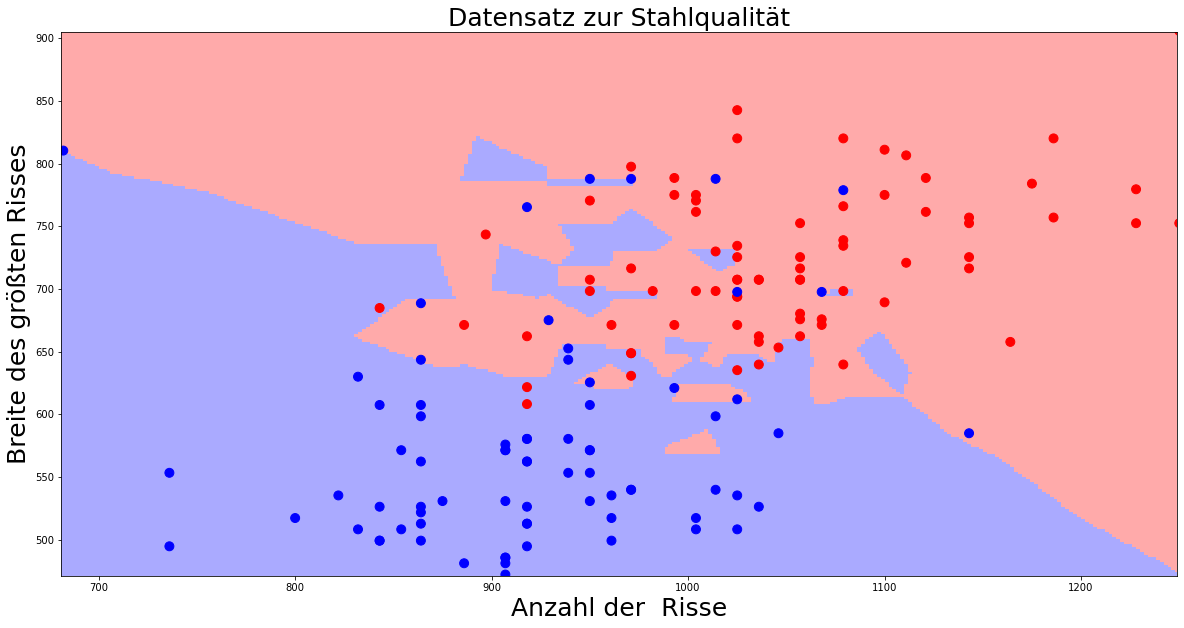

In [9]:
k = 1
clf = neighbors.KNeighborsClassifier(k) # Initialisierung eines kNN Modells mit einem Nachbarn
clf.fit(X_train, y_train) # Fitten des Modells
plotPrediction(clf, X_test.iloc[:, 0], X_test.iloc[:, 1], 'Anzahl der  Risse', 'Breite des größten Risses', y_test, title="Datensatz zur Stahlqualität")

<hr style="border:1px solid black"> </hr>

### Gütemaße 

Mit Hilfe der Python Bibliothek sklearn lassen sich die in der Vorlesung thematisierten Gütemaße berechnen.  

##### Confusion Matrix

In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, clf.predict(X_test)).transpose()
print(cm)

[[62 12]
 [12 64]]


In [11]:
cm_norm = cm/cm.sum(axis=0)
print(cm_norm)

[[0.83783784 0.15789474]
 [0.16216216 0.84210526]]


<div class="alert alert-block alert-success">
    <b>Frage:</b> Wo sind die Einträge aus der Variable <tt>cm_norm</tt> in der Vorlesung wiederzufinden?
</div>

**Antwort:** Die Werte entsprechen den Seitenlängen des Einheitsquadrates. 

##### Accuracy

In [12]:
from sklearn.metrics import accuracy_score 
print(accuracy_score(y_test, clf.predict(X_test)))

0.84


##### Precision und Recall 

In [13]:
prec = cm[0,0]/(cm[0,0]+cm[0,1])
print(prec)

0.8378378378378378


<div class="alert alert-block alert-success">
<b>Arbeitsauftrag:</b> Kopieren Sie den Code aus der vorhergehenden Zelle und änderen Sie ihn so ab, dass mit der Variable <tt>rec</tt> der Recall berechnet und ausgegeben wird. 
</div>

In [14]:
# Platz für den Arbeitsauftrag
rec = cm[0,0]/(cm[0,0]+cm[1,0])
print(rec)

0.8378378378378378


##### F1 Score

In [15]:
F1 = 2*(prec*rec)/(prec+rec)
print(F1)

0.8378378378378378
